In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.models import Model

# ResNet-50 Architecture
This architecture is short version of ResNet-150 layer architecture. The total layers are reduced to 50 in order to reduce 
computational complexity of the structure.

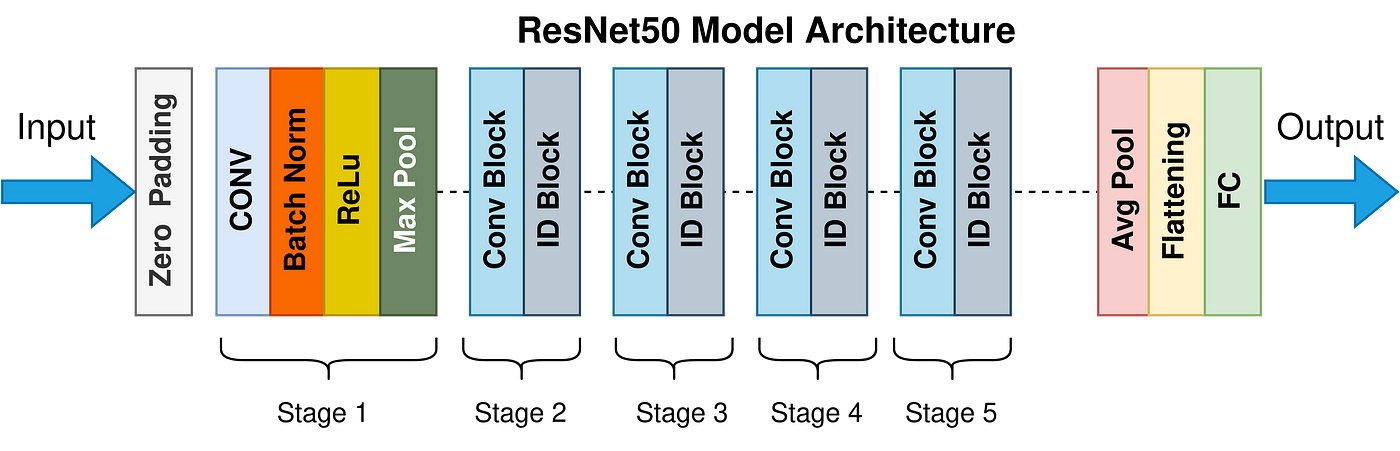
<b> Source:- </b> https://miro.medium.com/v2/resize:fit:1400/0*tH9evuOFqk8F41FG.png

In [ ]:
def Identity_Block(x, filter_list, kernel_shape):
    x_skip = x
    
    x = layers.Conv2D(filters = filter_list[0], kernel_size = (1, 1), strides = (1,1), padding = 'valid')(x)
    x = layers.BatchNormalization(axis = 3)(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters = filter_list[1], kernel_size = kernel_shape, strides = (1,1), padding = 'same')(x)
    x = layers.BatchNormalization(axis = 3)(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters = filter_list[2], kernel_size = (1, 1), strides = (1,1), padding = 'valid')(x)
    x = layers.BatchNormalization(axis = 3)(x)
    
    x = layers.Add()([x, x_skip])
    x = layers.Activation('relu')(x)
    
    return x

In [ ]:
def Convolutional_Block(x, filter_list, kernel_shape):
    x_skip = x
    
    x = layers.Conv2D(filters = filter_list[0], kernel_size = (1, 1), strides = (2,2), padding='valid')(x)
    x = layers.BatchNormalization(axis = 3)(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters = filter_list[1], kernel_size = kernel_shape, strides = (1,1), padding='same')(x)
    x = layers.BatchNormalization(axis = 3)(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters = filter_list[2], kernel_size = (1, 1), strides = (1,1), padding='valid')(x)
    x = layers.BatchNormalization(axis = 3)(x)
    
    x_skip = layers.Conv2D(filters = filter_list[2], kernel_size = (1, 1), strides = (2,2), padding='valid')(x_skip)
    x_skip = layers.BatchNormalization(axis = 3)(x_skip)
    
    
    x = layers.Add()([x_skip, x])
    x = layers.Activation('relu')(x)
    
    return x

In [ ]:
def ResNet(input_shape, classes):
    x_input = layers.Input(input_shape)
    x = layers.ZeroPadding2D((3, 3))(x_input)
    
    # Level 1 
    x = layers.Conv2D(64, kernel_size = (7, 7), strides = (2, 2))(x)
    x = layers.BatchNormalization(axis = 3)(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D((3,3), strides = (2, 2))(x)
    
    # Level 2
    x = Convolutional_Block(x, [64, 64, 128], (3,3))
    x = Identity_Block(x, [64, 64, 128], (3,3))
    x = Identity_Block(x, [64, 64, 128], (3,3))
    
    # Level 3
    x = Convolutional_Block(x, [256, 256, 512], (3,3))
    x = Identity_Block(x, [256, 256, 512], (3,3))
    x = Identity_Block(x, [256, 256, 512], (3,3))
    x = Identity_Block(x, [256, 256, 512], (3,3))
    
    # Level 4
    x = Convolutional_Block(x, [512, 512, 1024], (3,3))
    x = Identity_Block(x, [512, 512, 1024], (3,3))
    x = Identity_Block(x, [512, 512, 1024], (3,3))
    x = Identity_Block(x, [512, 512, 1024], (3,3))
    x = Identity_Block(x, [512, 512, 1024], (3,3))
    x = Identity_Block(x, [512, 512, 1024], (3,3))
    
    # Level 5
    x = Convolutional_Block(x, [512, 512, 1024], (3,3))
    x = layers.AveragePooling2D((3,3), strides=(2,2))(x)
    
    # Flattenning Stage
    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation = 'relu')(x)
    x = layers.Dense(classes, activation = 'softmax')(x)
    
    our_model = Model(inputs = x_input, outputs = x, name = 'ResNet50')
    
    return our_model

In [ ]:
resnet_model = ResNet((224,224,3), 5) # shape and classes number can be chosen accordingly
resnet_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = 'adam', metrics = ['accuracy'])

# AlexNet Architecture
This structure was taken from the book <i><b> "Neural Networks and Deep Learning"</b> </i> by <i> Charu C Aggarwal</i>.

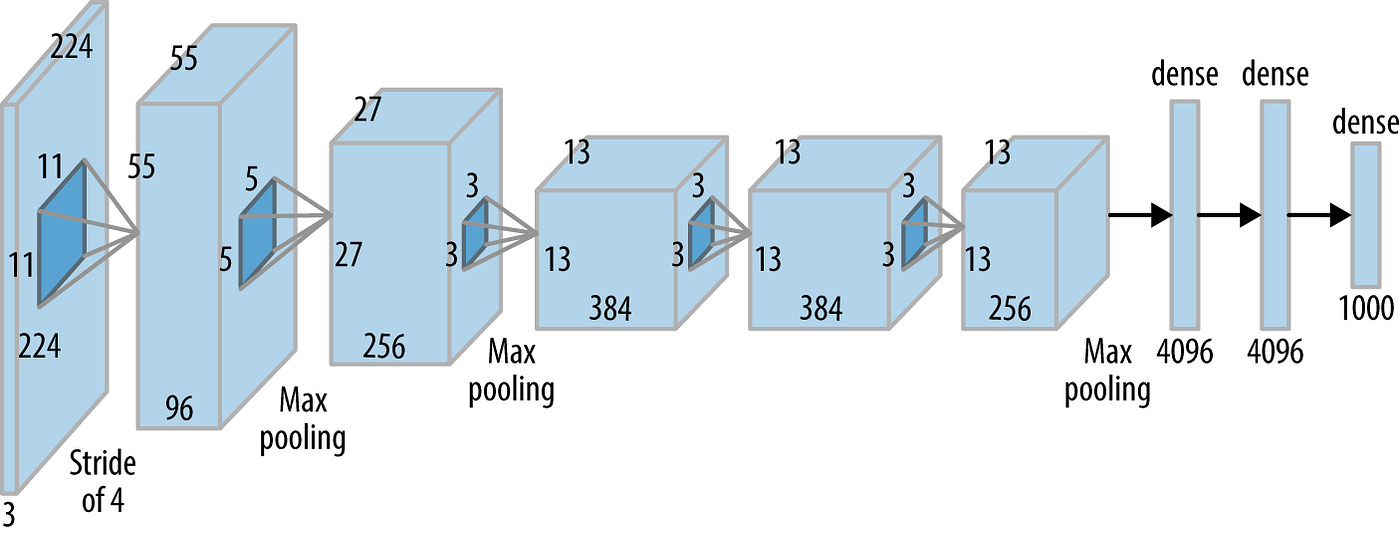

<b>Source:-</b> https://miro.medium.com/v2/resize:fit:1400/1*bD_DMBtKwveuzIkQTwjKQQ.png

In [ ]:
def AlexNet(input_size, classes):
    model = models.Sequential([
        # Level 1
        layers.Conv2D(filters = 96, kernel_size=(11, 11), strides=(4,4), activation='relu', input_shape = input_size, 
                      padding='valid'),
        layers.BatchNormalization(axis=3),
        layers.MaxPool2D((2,2), strides=(2,2), padding='valid'),
        
        # Level 2
        layers.Conv2D(filters = 256, kernel_size=(11,11), strides=(1,1), activation='relu', padding='valid'),
        layers.BatchNormalization(axis=3),
        layers.MaxPool2D((2,2), strides=(2,2), padding='valid'),
        
        # Level 3
        layers.Conv2D(filters = 384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid'),
        layers.BatchNormalization(axis=3),
        layers.Conv2D(filters = 384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid'),
        layers.BatchNormalization(axis=3),
        layers.Conv2D(filters = 256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid'),
        layers.BatchNormalization(axis=3),
        layers.MaxPool2D((2,2), strides=(2,2), padding='valid'),
        
        layers.Flatten(),
        
        # Level 4
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        
        # Level 5
        layers.Dense(classes, activation='softmax')
    ])
    
    return model

In [ ]:
alexnet_model = AlexNet((224,224, 3), 5) # shape and class number can be chosen accordingly
alexnet_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = 'adam', metrics = ['accuracy'])

# ZFNet Architecture
This structure was taken from the textbook <i><b> "Neural Networks and Deep Learning"</b> </i> by <i> Charu C Aggarwal</i>.
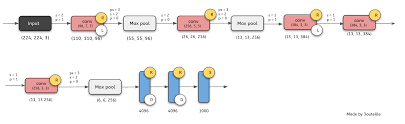
<b> Source:-</b> https://hackmd.io/@machine-learning/ByaTE80BI

In [ ]:
def ZFNet(input_size, classes):
    model = models.Sequential([
        # Level 1
        layers.Conv2D(filters = 96, kernel_size=(7, 7), strides=(2,2), activation='relu', input_shape = input_size, 
                      padding='valid'),
        layers.BatchNormalization(axis=3),
        layers.MaxPool2D((2,2), strides=(2,2), padding='valid'),
        
        # Level 2
        layers.Conv2D(filters = 256, kernel_size=(11,11), strides=(2,2), activation='relu', padding='valid'),
        layers.BatchNormalization(axis=3),
        layers.MaxPool2D((2,2), strides=(2,2), padding='valid'),
        
        # Level 3
        layers.Conv2D(filters = 512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid'),
        layers.BatchNormalization(axis=3),
        layers.Conv2D(filters = 1024, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid'),
        layers.BatchNormalization(axis=3),
        layers.Conv2D(filters = 512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid'),
        layers.BatchNormalization(axis=3),
        layers.MaxPool2D((2,2), strides=(2,2), padding='valid'),
        
        layers.Flatten(),
        
        # Level 4
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        
        # Level 5
        layers.Dense(classes, activation='softmax')
    ])
    
    return model

In [ ]:
zfnet_model = ZFNet((224, 224, 3), 5)
zfnet_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = 'adam', metrics = ['accuracy'])

# VGG-16 Architecture

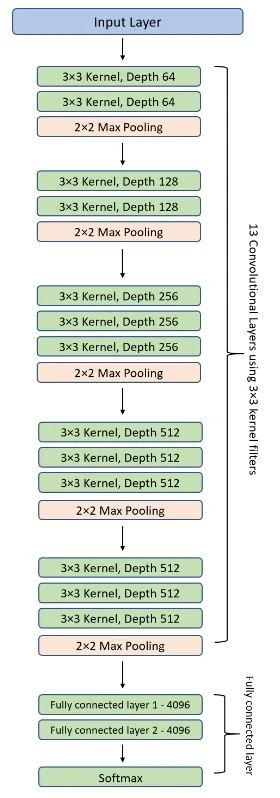
<b>Source:- </b> https://viso.ai/wp-content/uploads/2021/10/VGG-16-architecture-of-the-model.jpg

In [ ]:
def VGG(input_size, classes):
    model = models.Sequential([
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),
        
        layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),
        
        layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
        layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
        layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),
        
        layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
        layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
        layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),
        
        layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
        layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
        layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D((2,2)),
        
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(classes, activation='softmax')
    ])
    
    return model

In [ ]:
vgg_model = VGG((224,224,3), 5)
vgg_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = 'adam', metrics = ['accuracy'])